In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from math import sqrt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from lightgbm import LGBMRegressor

In [17]:
rental = pd.read_csv('Final_rental_big.csv')
rental=rental.drop_duplicates()

In [18]:
rental.head()

,price,bedroom_num,bathroom_num,latitude,longitude,location,24HMaintenance,24HOnSiteSecurity,24HSurveillance,24hEmergency,...,WindowCoverings,WineFridge,freezerincluded,fridgeincluded,gym,internetavailable,meetingroom,ovenincluded,smokerfriendly,HasDen
0,1864.0,1.0,1.0,43.686516,-79.421005,York,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2003.0,1.0,1.0,43.686516,-79.421005,York,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2347.0,2.0,1.0,43.686516,-79.421005,York,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2134.0,1.0,1.0,43.689224,-79.411199,Toronto,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2475.0,2.0,1.0,43.689224,-79.411199,Toronto,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [19]:
#Min max scaler latitude and longitude
lat_scaler = MinMaxScaler()
rental['latitude'] = lat_scaler.fit_transform(rental['latitude'].values.reshape(-1, 1))

long_scaler = MinMaxScaler()
rental['longitude'] = long_scaler.fit_transform(rental['longitude'].values.reshape(-1, 1))

In [20]:
rental.head()

,price,bedroom_num,bathroom_num,latitude,longitude,location,24HMaintenance,24HOnSiteSecurity,24HSurveillance,24hEmergency,...,WindowCoverings,WineFridge,freezerincluded,fridgeincluded,gym,internetavailable,meetingroom,ovenincluded,smokerfriendly,HasDen
0,1864.0,1.0,1.0,0.487834,0.474460,York,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2003.0,1.0,1.0,0.487834,0.474460,York,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2347.0,2.0,1.0,0.487834,0.474460,York,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2134.0,1.0,1.0,0.497749,0.497459,Toronto,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2475.0,2.0,1.0,0.497749,0.497459,Toronto,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [21]:
#One hot encoding location col, concat to df and delete the original location col
enc = OneHotEncoder(handle_unknown='ignore')
matrix_fitted = enc.fit_transform(rental.location.values.reshape(-1, 1)).toarray()
matrix_colname = enc.get_feature_names(['location'])
fitted_df = pd.DataFrame(matrix_fitted, columns=matrix_colname)
final_rental = pd.concat([rental, fitted_df], sort=False, axis = 1).drop(columns=['location'])
final_rental.head()

,price,bedroom_num,bathroom_num,latitude,longitude,24HMaintenance,24HOnSiteSecurity,24HSurveillance,24hEmergency,24hSecurity,...,location_EastYork,location_Etobicoke,location_Markham,location_Mississauga,location_NorthYork,location_Scarborough,location_Thornhill,location_Toronto,location_Vaughan,location_York
0,1864.0,1.0,1.0,0.487834,0.474460,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2003.0,1.0,1.0,0.487834,0.474460,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2347.0,2.0,1.0,0.487834,0.474460,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2134.0,1.0,1.0,0.497749,0.497459,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2475.0,2.0,1.0,0.497749,0.497459,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
#Reduced price set
reduced_rental = final_rental[final_rental['price'] <= 7741.5]

In [23]:
random_seed = 2020

In [40]:
reduced_rental = reduced_rental.fillna(value=0)

In [41]:
#80% train, 20% test
X = reduced_rental.drop(columns=['price'])
y = reduced_rental.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [42]:
def accuracy(test, pred):
    mse = mean_squared_error(test, pred)
    mae = mean_absolute_error(test, pred)
    print("Mean Squared Error is: {} \n".format(mse))
    print("Root Mean Squared Error is: {} \n".format(sqrt(mse)))
    print("Mean Absolute Error is: {} \n".format(mae))

# Lasso


In [43]:
from sklearn.linear_model import Lasso

In [44]:
X_train.shape

(5601, 235)

In [45]:
X_train.head()

,bedroom_num,bathroom_num,latitude,longitude,24HMaintenance,24HOnSiteSecurity,24HSurveillance,24hEmergency,24hSecurity,8,...,location_EastYork,location_Etobicoke,location_Markham,location_Mississauga,location_NorthYork,location_Scarborough,location_Thornhill,location_Toronto,location_Vaughan,location_York
2364,5.0,4.0,0.342727,0.582599,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6481,2.0,1.0,0.306871,0.513100,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1824,2.0,2.0,0.428520,0.536990,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5823,4.0,2.0,0.426156,0.641949,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2414,0.0,1.0,0.888454,0.239235,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [68]:
def lasso_regression(train,train_label,test,test_label, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(train,train_label)
    
    lasso_train_pred = lassoreg.predict(train)
    train_accu=accuracy(train_label, lasso_train_pred)
    
    lasso_pred = lassoreg.predict(test)
    test_accu=accuracy(test_label, lasso_pred)
    
    
    #Return the result in pre-defined format
    rss = sum((lasso_train_pred-train_label)**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret
    #return accuracy(y_test, lgbm_pred)

In [69]:
columnNamesArr = list(X_train.columns.values)
len_column=len(columnNamesArr)

In [72]:
##Alpha Selection

alpha_lasso = [1e-5,1e-4, 1e-3,1e-2, 0.1,1, 5, 10]

#Initialize the dataframe to store coefficients
columnNamesArr = list(X_train.columns.values)
col = ['rss','intercept'] + [columnNamesArr[i] for i in range(0,len_column)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,8)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {0.1:111}

#Iterate over the 10 alpha values:
for i in range(8):
    print('Alpha: ',alpha_lasso[i])
    coef_matrix_lasso.iloc[i,] = lasso_regression(X_train,y_train,X_test,y_test,
                                                 alpha_lasso[i], models_to_plot)
    



Alpha:  1e-05
Mean Squared Error is: 486194.8743813398 

Root Mean Squared Error is: 697.2767559451124 

Mean Absolute Error is: 494.7829188710434 

Mean Squared Error is: 594273.4551232249 

Root Mean Squared Error is: 770.8913380776988 

Mean Absolute Error is: 529.8443895286829 

Alpha:  0.0001
Mean Squared Error is: 486195.0519220006 

Root Mean Squared Error is: 697.2768832551388 

Mean Absolute Error is: 494.77915155710565 

Mean Squared Error is: 594277.4635829221 

Root Mean Squared Error is: 770.8939379596405 

Mean Absolute Error is: 529.8333489850716 

Alpha:  0.001
Mean Squared Error is: 486210.28029349685 

Root Mean Squared Error is: 697.2878030580321 

Mean Absolute Error is: 494.7351267042428 

Mean Squared Error is: 594287.0204591615 

Root Mean Squared Error is: 770.9001365022331 

Mean Absolute Error is: 529.6933752332617 

Alpha:  0.01
Mean Squared Error is: 486900.8656570876 

Root Mean Squared Error is: 697.7828212682565 

Mean Absolute Error is: 494.6310962049116

In [73]:
coef_matrix_lasso

,rss,intercept,bedroom_num,bathroom_num,latitude,longitude,24HMaintenance,24HOnSiteSecurity,24HSurveillance,24hEmergency,...,location_EastYork,location_Etobicoke,location_Markham,location_Mississauga,location_NorthYork,location_Scarborough,location_Thornhill,location_Toronto,location_Vaughan,location_York
alpha_1e-05,2.72318e+09,2634.37,21.3361,38.768,-553.113,164.535,66.5744,-364.059,1059.44,-74.1084,...,-309.879,-188.353,-36.6746,-76.6194,-153.875,-109.804,-229.576,-149.158,-69.5022,-78.7781
alpha_0.0001,2.72318e+09,2629.47,21.3392,38.7601,-553.185,164.589,54.2019,-363.893,1042.77,-74.0845,...,-305.041,-183.534,-31.6739,-71.7026,-148.985,-104.921,-224.609,-144.287,-64.5851,-73.919
alpha_0.001,2.72326e+09,2583.5,21.374,38.6765,-553.716,164.943,0,-362.745,908.692,-73.633,...,-259.639,-138.253,12.9639,-25.5595,-102.965,-58.9652,-177.767,-98.5193,-18.3768,-28.1789
alpha_0.01,2.72713e+09,2482.47,21.7908,38.209,-553.727,164.9,7.33248,-348.537,0,-65.3194,...,-163.933,-43.1038,101.481,61.8244,-2.43688,34.185,-68.4545,-0,69.7357,61.3774
alpha_0.1,2.80464e+09,2484.86,23.1039,33.1357,-502.968,116.729,0,-225.38,-14.6881,-16.853,...,-158.564,-38.1432,0,5.02655,-0,0,-0,0,0,4.44131
alpha_1,3.32027e+09,2500.68,0,0,-106.921,0,-0,-0,-0,-0,...,-0,-0,0,0,-0,0,-0,0,0,0
alpha_5,3.54106e+09,2446.78,0,0,-0,-0,-0,-0,-0,-0,...,-0,-0,-0,0,-0,-0,-0,0,0,0
alpha_10,3.54106e+09,2446.78,0,0,-0,-0,-0,-0,-0,-0,...,-0,-0,-0,0,-0,-0,-0,0,0,0


In [75]:
## Number of variable shrink to 0
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-05       5
alpha_0.0001      5
alpha_0.001       8
alpha_0.01       26
alpha_0.1       126
alpha_1         228
alpha_5         235
alpha_10        235
dtype: int64

In [80]:
lassoreg = Lasso(alpha=0.05,normalize=True, max_iter=1e5)
lassoreg.fit(X_train,y_train)

lasso_train_pred = lassoreg.predict(X_train)
train_accu=accuracy(y_train, lasso_train_pred)

lasso_pred = lassoreg.predict(X_test)
test_accu=accuracy(y_test, lasso_pred)

Mean Squared Error is: 492084.8287545454 

Root Mean Squared Error is: 701.487582751502 

Mean Absolute Error is: 495.6066327247573 

Mean Squared Error is: 602311.7834567361 

Root Mean Squared Error is: 776.0874844092875 

Mean Absolute Error is: 530.2434587303259 



[Text(0, 0.5, 'Rental Price'), Text(0.5, 0, 'Property records')]

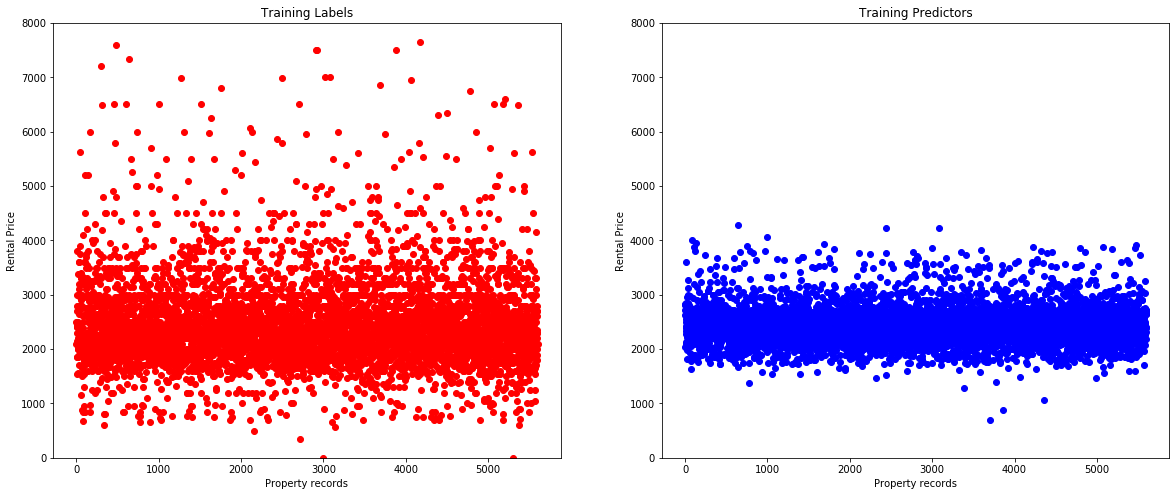

In [81]:

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(20, 8))
ax1.plot(np.array(y_train),'ro')
ax1.set_ylim([0, 8000])
ax1.set_title('Training Labels')
ax1.set(xlabel='Property records', ylabel='Rental Price')

ax2.plot(np.array(lasso_train_pred),'ro',color='blue')
ax2.set_ylim([0, 8000])
ax2.set_title('Training Predictors')
ax2.set(xlabel='Property records', ylabel='Rental Price')


Text(0, 0.5, 'actual price')

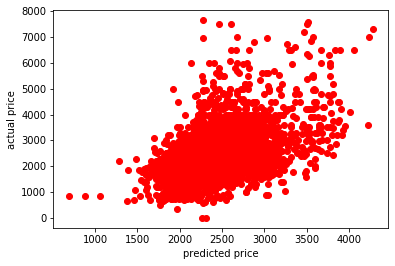

In [86]:
plt.plot(lasso_train_pred,y_train,'ro')
plt.xlabel('predicted price')
plt.ylabel('actual price')

[Text(0, 0.5, 'Rental Price'), Text(0.5, 0, 'Property records')]

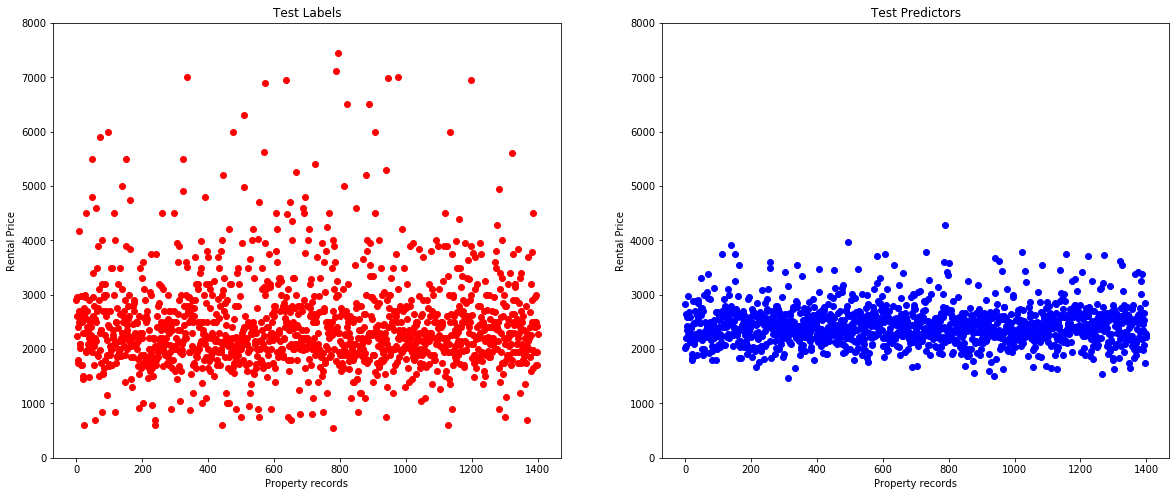

In [82]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(20, 8))
ax1.plot(np.array(y_test),'ro')
ax1.set_ylim([0, 8000])
ax1.set_title('Test Labels')
ax1.set(xlabel='Property records', ylabel='Rental Price')

ax2.plot(np.array(lasso_pred),'ro',color='blue')
ax2.set_ylim([0, 8000])
ax2.set_title('Test Predictors')
ax2.set(xlabel='Property records', ylabel='Rental Price')


Text(0, 0.5, 'actual price')

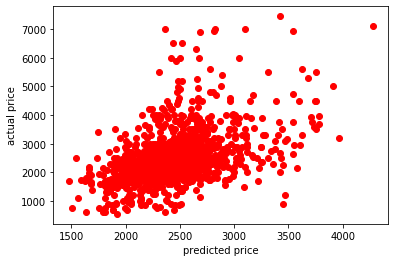

In [87]:
plt.plot(lasso_pred,y_test,'ro')
plt.xlabel('predicted price')
plt.ylabel('actual price')